In [25]:
import tensorflow as tf

In [26]:
print('TensorFlow Version: {}'.format(tf.__version__))

TensorFlow Version: 2.11.0


In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [28]:
data = pd.read_csv('test/credit-a.csv')

In [29]:
data

,0,30.83,0.1,0.2,0.3,9,0.4,1.25,0.5,0.6,1,1.1,0.7,202,0.8,-1
0,1,58.67,4.460,0,0,8,1,3.04,0,0,6,1,0,43,560.0,-1
1,1,24.50,0.500,0,0,8,1,1.50,0,1,0,1,0,280,824.0,-1
2,0,27.83,1.540,0,0,9,0,3.75,0,0,5,0,0,100,3.0,-1
3,0,20.17,5.625,0,0,9,0,1.71,0,1,0,1,2,120,0.0,-1
4,0,32.08,4.000,0,0,6,0,2.50,0,1,0,0,0,360,0.0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
647,0,21.08,10.085,1,1,11,1,1.25,1,1,0,1,0,260,0.0,1
648,1,22.67,0.750,0,0,0,0,2.00,1,0,2,0,0,200,394.0,1
649,1,25.25,13.500,1,1,13,7,2.00,1,0,1,0,0,200,1.0,1
650,0,17.92,0.205,0,0,12,0,0.04,1,1,0,1,0,280,750.0,1


data.head() 默认显示前五行

data.head()，此时没有表头

In [30]:
data = pd.read_csv('test/credit-a.csv', header = None)

In [31]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0,30.83,0.000,0,0,9,0,1.25,0,0,1,1,0,202,0.0,-1
1,1,58.67,4.460,0,0,8,1,3.04,0,0,6,1,0,43,560.0,-1
2,1,24.50,0.500,0,0,8,1,1.50,0,1,0,1,0,280,824.0,-1
3,0,27.83,1.540,0,0,9,0,3.75,0,0,5,0,0,100,3.0,-1
4,0,20.17,5.625,0,0,9,0,1.71,0,1,0,1,2,120,0.0,-1


查看标志为1和-1的数据的个数

In [32]:
data.iloc[:, -1].value_counts()

 1    357
-1    296
Name: 15, dtype: int64

In [33]:
x = data.iloc[:, :-1]
y = data.iloc[:, -1].replace(-1, 0)

In [34]:
model = tf.keras.Sequential()  

有两个隐藏层，一个隐藏层有4个隐藏单元数，输入的形状为前15列，也就是input_shape=(15,)

最后输出时输出层的激活函数为sigmoid，把它映射成一个（0，1）的概率值

In [35]:
model.add(tf.keras.layers.Dense(4, input_shape=(15,), activation='relu'))
model.add(tf.keras.layers.Dense(4, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [36]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 4)                 64        
                                                                 
 dense_10 (Dense)            (None, 4)                 20        
                                                                 
 dense_11 (Dense)            (None, 1)                 5         
                                                                 
Total params: 89
Trainable params: 89
Non-trainable params: 0
_________________________________________________________________


metrics=['acc']输出正确率，binary_crossentropy交叉熵

In [39]:
model.compile(optimizer = 'adam',
             loss = 'binary_crossentropy',
             metrics=['acc']
             )

In [40]:
history = model.fit(x, y, epochs = 100)

Epoch 1/100
21/21 [==============================] - 1s 1ms/step - loss: 0.8423 - acc: 0.3629
Epoch 2/100
21/21 [==============================] - 0s 1ms/step - loss: 0.6954 - acc: 0.5130
Epoch 3/100
21/21 [==============================] - 0s 960us/step - loss: 0.6712 - acc: 0.5590
Epoch 4/100
21/21 [==============================] - 0s 934us/step - loss: 0.6700 - acc: 0.5620
Epoch 5/100
21/21 [==============================] - 0s 1ms/step - loss: 0.6688 - acc: 0.6034
Epoch 6/100
21/21 [==============================] - 0s 974us/step - loss: 0.6672 - acc: 0.6616
Epoch 7/100
21/21 [==============================] - 0s 950us/step - loss: 0.6658 - acc: 0.6585
Epoch 8/100
21/21 [==============================] - 0s 1ms/step - loss: 0.6649 - acc: 0.6692
Epoch 9/100
21/21 [==============================] - 0s 1ms/step - loss: 0.6629 - acc: 0.6708
Epoch 10/100
21/21 [==============================] - 0s 1ms/step - loss: 0.6613 - acc: 0.6738
Epoch 11/100
21/21 [==============================]

21/21 [==============================] - 0s 1ms/step - loss: 0.5654 - acc: 0.7427
Epoch 87/100
21/21 [==============================] - 0s 940us/step - loss: 0.5624 - acc: 0.7458
Epoch 88/100
21/21 [==============================] - 0s 953us/step - loss: 0.5602 - acc: 0.7473
Epoch 89/100
21/21 [==============================] - 0s 931us/step - loss: 0.5600 - acc: 0.7473
Epoch 90/100
21/21 [==============================] - 0s 980us/step - loss: 0.5571 - acc: 0.7473
Epoch 91/100
21/21 [==============================] - 0s 894us/step - loss: 0.5594 - acc: 0.7427
Epoch 92/100
21/21 [==============================] - 0s 1ms/step - loss: 0.5563 - acc: 0.7489
Epoch 93/100
21/21 [==============================] - 0s 952us/step - loss: 0.5538 - acc: 0.7519
Epoch 94/100
21/21 [==============================] - 0s 1ms/step - loss: 0.5579 - acc: 0.7458
Epoch 95/100
21/21 [==============================] - 0s 953us/step - loss: 0.5544 - acc: 0.7473
Epoch 96/100
21/21 [=============================

history.history相当于一个字典（dictionary），记录了loss和acc的变换，损失和正确率

In [42]:
history.history.keys()

dict_keys(['loss', 'acc'])

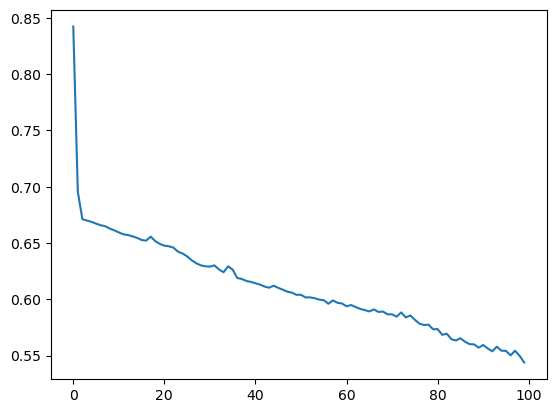

In [45]:
plt.plot(history.epoch, history.history.get('loss'))

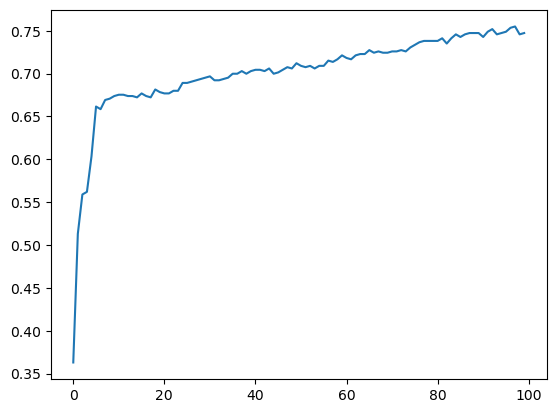

In [46]:
plt.plot(history.epoch, history.history.get('acc'))